In [1]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))


TF Version:  2.17.0
TF Hub version:  0.16.1
Eager mode enabled:  True
GPU available:  []


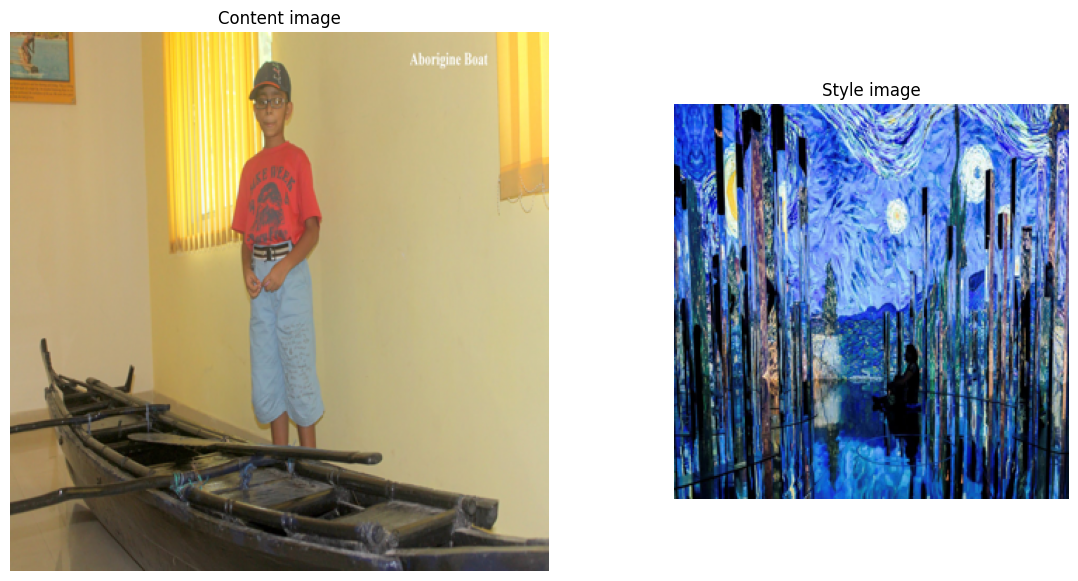

In [34]:
import functools
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow_hub as hub  # Import TensorFlow Hub

def crop_center(image):
    """Returns a cropped square image."""
    shape = image.shape
    new_shape = min(shape[1], shape[2])
    offset_y = max(shape[1] - shape[2], 0) // 2
    offset_x = max(shape[2] - shape[1], 0) // 2
    image = tf.image.crop_to_bounding_box(
        image, offset_y, offset_x, new_shape, new_shape)
    return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
    """Loads and preprocesses images."""
    # Cache image file locally.
    image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
    # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
    img = tf.io.decode_image(
        tf.io.read_file(image_path),
        channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = crop_center(img)
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=preserve_aspect_ratio)
    return img

def show_n(images, titles=('',)):
    n = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w * n, w))
    gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
    for i in range(n):
        plt.subplot(gs[i])
        plt.imshow(images[i], aspect='equal')
        plt.axis('off')
        plt.title(titles[i] if len(titles) > i else '')
    plt.show()

# Load and process images
from PIL import Image

content_image_url = 'C:/Users/sudip/Downloads/Andaman Dec 2012-001/Andaman Dec 2012/IMG_2701.jpg'
#style_image_url = 'https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg'
style_image_url= 'C:/Users/sudip/Downloads/style2.jpeg'
output_image_size = 384  # Desired output size

# Define the sizes for content and style images
content_img_size = (output_image_size, output_image_size)
style_img_size = (256, 256)

# Load and resize the content image from local path
content_image = Image.open(content_image_url)
content_image = content_image.resize(content_img_size)
content_image_np = np.array(content_image) / 255.0  # Convert to NumPy array and normalize

# Convert the content image to a tensor
content_image_tf = tf.convert_to_tensor(content_image_np, dtype=tf.float32)
content_image_tf = content_image_tf[tf.newaxis, ...]  # Add batch dimension

# Load and preprocess the style image from URL
style_image = Image.open(style_image_url)
style_image = style_image.resize(style_img_size)
style_image_np = np.array(style_image) / 255.0  # Convert to NumPy array and normalize


# Convert the content image to a tensor
style_image_tf = tf.convert_to_tensor(style_image_np, dtype=tf.float32)
style_image_tf = style_image_tf[tf.newaxis, ...]  # Add batch dimension

# Display the images
show_n([content_image_np, style_image_np], ['Content image', 'Style image'])

In [35]:

# Load TF Hub module
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)


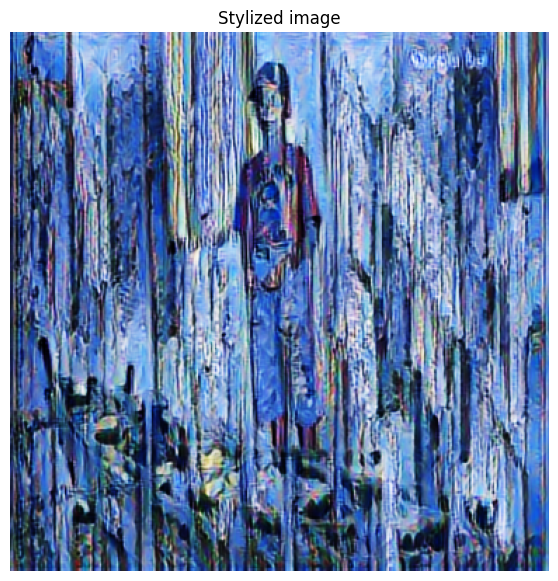

In [36]:
# Run the style transfer
outputs = hub_module(content_image_tf, style_image_tf)
stylized_image = outputs[0]

# Display the stylized image
show_n([stylized_image[0].numpy()], ['Stylized image'])

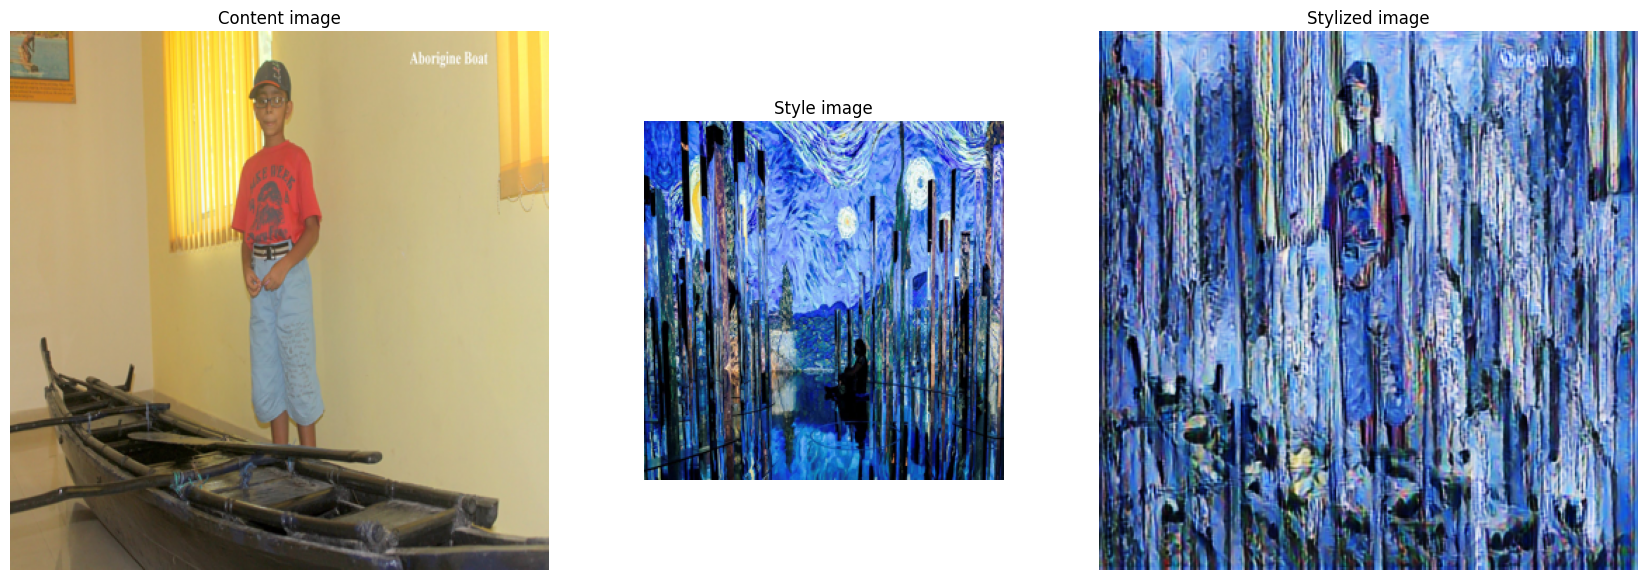

In [37]:
# Visualize input images and the generated stylized image.

show_n([content_image_np, style_image_np,stylized_image[0].numpy()], ['Content image', 'Style image','Stylized image'])